In [40]:
#import libraries


In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pylab
import os
%matplotlib inline

In [42]:
#check the file directory
os.getcwd()

'C:\\Users\\Spicywords'

In [43]:
#data acquisation 
data = pd.read_csv("FuelConsumptionCo2.csv")

In [44]:

data_4 = data[["ENGINESIZE","CYLINDERS","TRANSMISSION","FUELTYPE"]]
data_4.head(5)


,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE
0,2.0,4,AS5,Z
1,2.4,4,M6,Z
2,1.5,4,AV7,Z
3,3.5,6,AS6,Z
4,3.5,6,AS6,Z


In [45]:
#data exploration(EDA)
data.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [46]:
data.shape

(1067, 13)

In [47]:
data.describe()
select * FROM DATA 

SyntaxError: invalid syntax (<ipython-input-47-2f0d31afb070>, line 2)

In [48]:
#getting out the columns
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [49]:
#getting out some of the data out to visualization
cdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


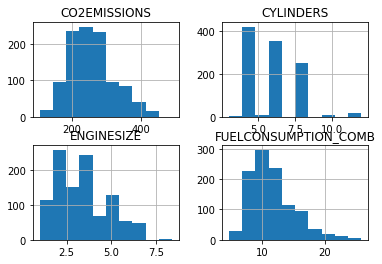

In [50]:
#visualise some of the description in histogram
viz = cdf
viz.hist()
plt.show()

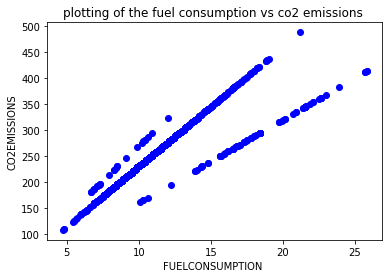

In [51]:
#visualise two independent variables using scatter plot
plt.scatter(x = data["FUELCONSUMPTION_COMB"], y = data["CO2EMISSIONS"], color = 'blue')
plt.xlabel("FUELCONSUMPTION ")
plt.ylabel("CO2EMISSIONS")
plt.title("plotting of the fuel consumption vs co2 emissions ")
plt.show()

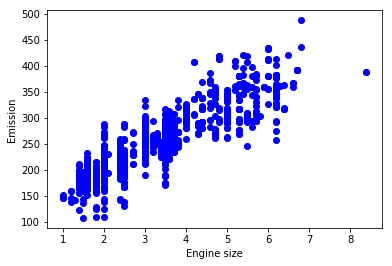

In [52]:
#visualise two independent variables using scatter plot
plt.scatter(data["ENGINESIZE"], data["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [53]:
#train/test split method in Regression plot using randow rows 

mrk = np.random.rand(len(data)) < 0.8
train = viz[mrk]
test = viz[~mrk]
mrk



array([False,  True,  True, ...,  True,  True,  True])

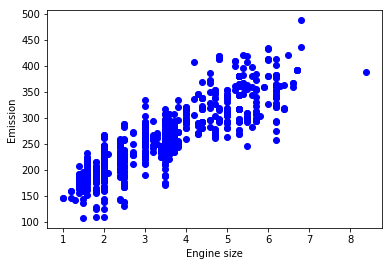

In [54]:
#train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


In [55]:
#import machine learning library
from sklearn import linear_model


In [56]:
#creating or intializing the linear model function
lm = linear_model.LinearRegression()

In [57]:
#training my data from random rows in different columns
train_x= np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
lm.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)


Coefficients:  [[39.2311481]]
Intercept:  [124.31262522]


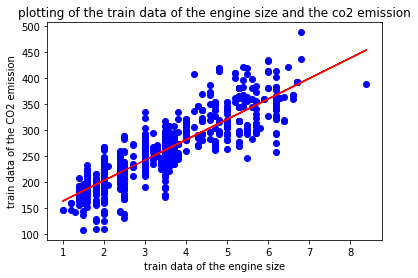

<Figure size 1440x1368 with 0 Axes>

In [58]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, lm.coef_[0][0]*train_x + lm.intercept_[0], '-r')
plt.xlabel("train data of the engine size")
plt.ylabel("train data of the CO2 emission")
plt.title ("plotting of the train data of the engine size and the co2 emission")
plt.figure(figsize = (20,19))
plt.show()


In [59]:
#model evaluation 

from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = lm.predict(test_x)
print("the mean squared error : %.2f "% np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE) : %.2f" % np.mean((test_y_hat - test_y) **2))
print("the r squared score : %.2f "  % r2_score(test_y_hat , test_y))


the mean squared error : 20.13 
Residual sum of squares (MSE) : 730.17
the r squared score : 0.75 


In [60]:
#multiple Linear Regression

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.53029882  7.87565825 10.08041613]]


In [61]:
#prediction

y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 528.63
Variance score: 0.85


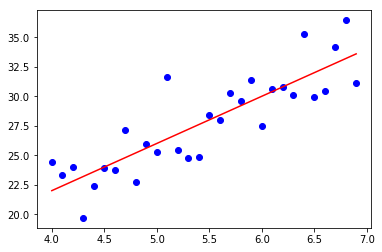

In [62]:
x = np.arange(4.0, 7.0, 0.1)

y = 4*(x) + 6

y_noise  = 2 *np.random.normal(size = x.size)

y_data = y + y_noise

plt.plot(x , y_data , 'bo')
plt.plot(x,y, 'r')



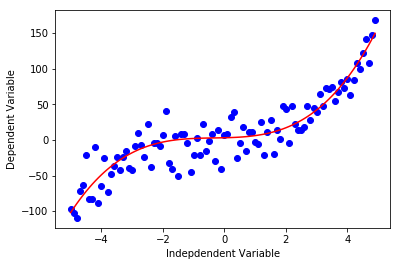

In [63]:
#Polynomial Relationship
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

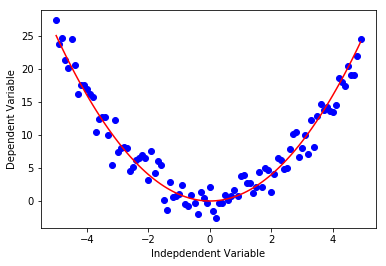

In [64]:
#Quadratic relationship
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

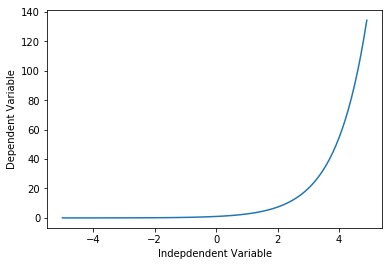

In [65]:
#Exponential Relationship
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


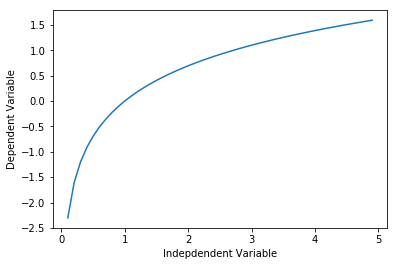

In [66]:
#Logarithim Relationship
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

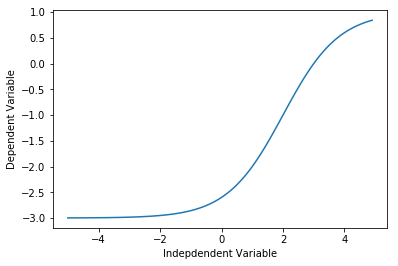

In [67]:
#sigmoidal/Logistic

X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [71]:
import numpy as np
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


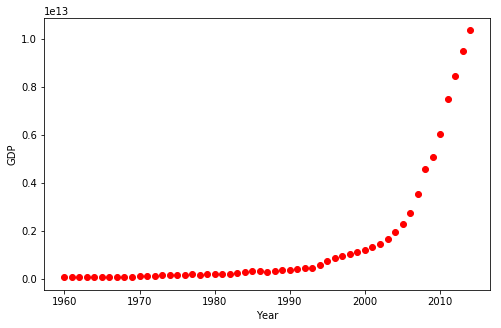

In [72]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

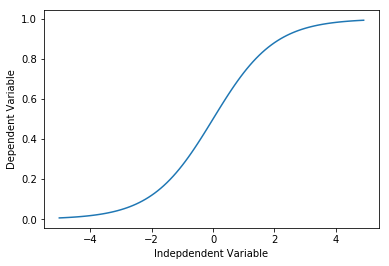

In [73]:
#choosing the kind of model
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [74]:
#Building the model
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

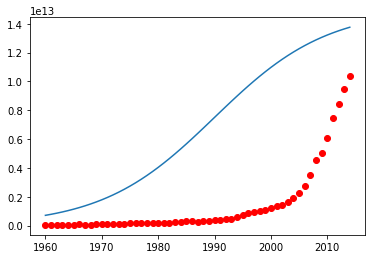

In [75]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [76]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [77]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


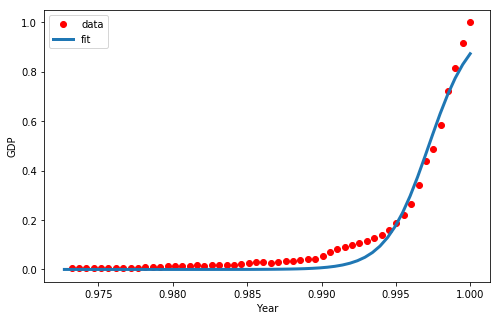

In [78]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()